## STAR WARS SURVEY
___

# Introduction

While waiting for `Star Wars: The Force Awakens` to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses.

Dataset they prepared I will investigate to find something intriguing.

# Goal-setting

I will clean and explore the dataset. Will find way to split datast into two groups (fans and casual viewers). Will make conclusion about both groups preferences. 

# Reading and familiarizating with data

In [84]:
# import pandas and numpy
import pandas as pd
import numpy as np
# read dataset
star_wars = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

First blank look showed that there are a few of unnamed columns. Also two columns `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` contain yes\no and nan answers. To make it work easier I will convert those columns to boolean type.

In [85]:
to_bool = {'Yes':True, 'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(to_bool, na_action = 'ignore')
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(to_bool, na_action = 'ignore')

# Cleaning and mapping Checkbox columns

The respondents checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* `Unnamed: 4` — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* `Unnamed: 5` — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* `Unnamed: 6` — whether or not the respondent saw Star Wars: Episode IV A New Hope.
* `Unnamed: 7` — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* `Unnamed: 8` — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

Let's convert columns above to boolean.

In [86]:
# dict to convert values in columns to boolean
episodes = {np.NaN:False, 
'Star Wars: Episode I  The Phantom Menace':True,
'Star Wars: Episode II  Attack of the Clones':True,
'Star Wars: Episode III  Revenge of the Sith':True,
'Star Wars: Episode IV  A New Hope':True,
'Star Wars: Episode V The Empire Strikes Back':True,
'Star Wars: Episode VI Return of the Jedi':True}
for each in star_wars.columns[3:9]:
    star_wars[each] = star_wars[each].map(episodes)
# rename columns to more inuitive form
column_map = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1','Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'}
star_wars = star_wars.rename(columns=column_map)

## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite.

To make dataset easier to work with I will convert those columns to numeric datatype and will rename columns.

In [87]:
# convert data to numeric (float) and rename columns inside for loop
for column, i in zip(star_wars.columns[9:15],[1,2,3,4,5,6]):
    star_wars[column]=star_wars[column][1:].astype(float)
    star_wars.rename(columns={column:f'ranking_{i}'}, inplace=True)

# Finding the highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. Do accompish this task we will calculate mean of each ranking column.

In [88]:
for each in star_wars.columns[9:15]:
    mapper = {'ranking_1':'Star Wars: Episode I  The Phantom Menace',
'ranking_2':'Star Wars: Episode II  Attack of the Clones',
'ranking_3':'Star Wars: Episode III  Revenge of the Sith',
'ranking_4':'Star Wars: Episode IV  A New Hope',
'ranking_5':'Star Wars: Episode V The Empire Strikes Back',
'ranking_6':'Star Wars: Episode VI Return of the Jedi'}
    mean_rating = star_wars[each].mean()
    print(f'Mean ranking for {mapper[each]}: '+ str(round(mean_rating,2)))

Mean ranking for Star Wars: Episode I  The Phantom Menace: 3.73
Mean ranking for Star Wars: Episode II  Attack of the Clones: 4.09
Mean ranking for Star Wars: Episode III  Revenge of the Sith: 4.34
Mean ranking for Star Wars: Episode IV  A New Hope: 3.27
Mean ranking for Star Wars: Episode V The Empire Strikes Back: 2.51
Mean ranking for Star Wars: Episode VI Return of the Jedi: 3.05


Let's visualise results to make everyone happy.

C:\Users\ilias\AppData\Local\Temp/ipykernel_4212/3075625188.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,rotation=90)


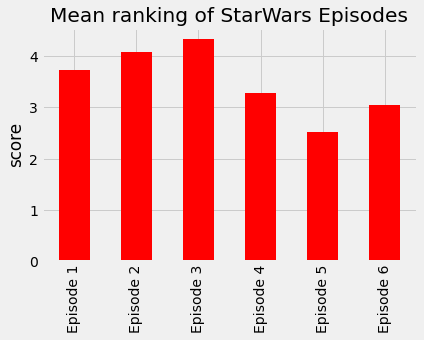

In [89]:
import matplotlib.style as style
import matplotlib.pyplot as plt 
style.use('fivethirtyeight')
# number of bars
N = 6
# data to plot
means = star_wars[star_wars.columns[9:15]].mean()
ind = np.arange(N)
width = 0.5
# visualizing
fig, ax = plt.subplots()
ax.bar(ind,means,width,color = 'r')
# adding text for labels
labels = ['0','Episode 1','Episode 2','Episode 3','Episode 4','Episode 5','Episode 6']
ax.set_ylabel('score')
ax.set_title('Mean ranking of StarWars Episodes')
ax.set_xticklabels(labels,rotation=90)
plt.show()


Barchart I've produced shows average rank of each episode. The lower score - the higher rank. Episode 5 is the favorite one. I am not a StarWars fan an can't explain this choice. But I can assume that Episodes before raised StarWars popularity. Also visual effects getting better. Those born after 2000 can't understand what it was back then when first episodes was released. It was state of the art, now those films look bit lame.

## Finding the most viewed movie

Next I would like to find the most viewed episode.

C:\Users\ilias\AppData\Local\Temp/ipykernel_4212/3871852716.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,rotation=90)


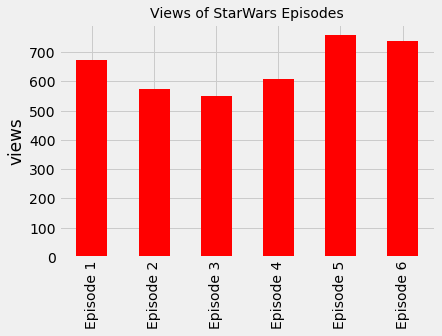

In [90]:
# number of bars
N = 6
# data to plot
views = star_wars[star_wars.columns[3:9]].sum()
ind = np.arange(N)
width = 0.5
# visualizing
fig, ax = plt.subplots()
ax.bar(ind,views,width,color = 'r')
# adding text for labels
labels = ['0','Episode 1','Episode 2','Episode 3','Episode 4','Episode 5','Episode 6']
ax.set_ylabel('views')
ax.set_title('Views of StarWars Episodes',font = 'block')
ax.set_xticklabels(labels,rotation=90)
plt.show()

Views and ranks correlates. The more views the higher rank. The first episode is the one everybody would try. Not everyone happy with StarWars I believe and those will not try 2 and 3rd episode. Definitely episodes succes depends on release compaign. People expect more from movies with good promo. I presume cinemas now more popular and affordable then before and those factors also contribute to high figures of views for latest episodes.

## Exploring the Data by Binary Segments

I would like to inv estigate dataset separately for two groups - StarWars fans and casual viewers. I am wondering if those groups will have the same favorite episode.  

C:\Users\ilias\AppData\Local\Temp/ipykernel_4212/1854637304.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,rotation=90)


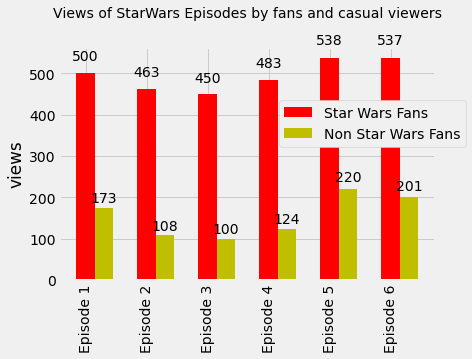

In [91]:
# splittind dataframe by fans and casual viewers
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
casual = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]
# plotting bar charts next to each other
# number of bars
N = 6
# data to plot
fan_data = fans[fans.columns[3:9]].sum()
casual_data = casual[casual.columns[3:9]].sum()
ind = np.arange(N)
width = 0.3
# visualizing
fig, ax = plt.subplots()
fan_bar = ax.bar(ind,fan_data,width,color = 'r')
casual_bar = ax.bar(ind+0.3,casual_data,width,color = 'y')
# adding text for labels
labels = ['0','Episode 1','Episode 2','Episode 3','Episode 4','Episode 5','Episode 6']
ax.set_ylabel('views')
ax.set_title('Views of StarWars Episodes by fans and casual viewers',font = 'block', y = 1.1)
ax.set_xticklabels(labels,rotation=90)
bars = [fan_bar, casual_bar]
ax.legend((fan_bar[0], casual_bar[0]), ('Star Wars Fans', 'Non Star Wars Fans'), bbox_to_anchor=(1.1, 0.8), loc = 'upper right', framealpha = 1)

def autolabel(bar):
    """
    Attach a text label above each bar displaying its height
    """
    for bara in bar:
        height = bara.get_height()
        ax.text(bara.get_x() + bara.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(fan_bar)
autolabel(casual_bar)
plt.show()


C:\Users\ilias\AppData\Local\Temp/ipykernel_4212/3675839823.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,rotation=90)


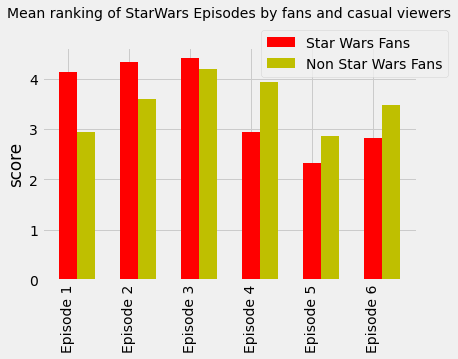

In [92]:
# number of bars
N = 6
# data to plot
fan_data = fans[fans.columns[9:15]].mean()
casual_data = casual[casual.columns[9:15]].mean()
ind = np.arange(N)
width = 0.3
# visualizing
#plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
fan_bar = ax.bar(ind,fan_data,width,color = 'r')
casual_bar = ax.bar(ind+0.3,casual_data,width,color = 'y')
# adding text for labels
labels = ['0','Episode 1','Episode 2','Episode 3','Episode 4','Episode 5','Episode 6']
ax.set_ylabel('score')
ax.set_title('Mean ranking of StarWars Episodes by fans and casual viewers',font = 'block', y = 1.1)
ax.set_xticklabels(labels,rotation=90)
bars = [fan_bar, casual_bar]
ax.legend((fan_bar[0], casual_bar[0]), ('Star Wars Fans', 'Non Star Wars Fans'), bbox_to_anchor=(1.1, 1.1), loc = 'upper right')


plt.show()

From barcharts above it is clear that there is  no significant deviations in ranking and total viewers in two groups namely fans and casual viewrs.

## Conclusion

>fans are more happy with first episodes while casual viewer more about latest ones. I can make assumption that fans appreciate story and casuals prefer special effects and picture rather than story behind.